In [193]:
import numpy as np
import matplotlib.pyplot as plt

arc_sec_to_rad = 4.85*10**(-6)

s2_ra = np.array([0.0386, 0.0385, 0.0393,
0.0330,0.0333,0.0315,0.0265,
0.0141,0.0137,0.0129,0.0107,
0.0064,0.0058,0.0069,0.0047,
-0.0076,-0.0082,-0.0084,-0.0118,
-0.0126,-0.0127,-0.0216,-0.0218,
-0.0233,-0.0266,-0.0249,-0.0260,
-0.0347,-0.0340,-0.0430,-0.0518,
-0.0603,-0.0690,])

s2_dec = np.array([0.0213,
0.0701,0.0733,0.1191,0.1206,
0.1206,0.1389,0.1596,0.1609,
0.1627,0.1633,0.1681,0.1682,
0.1691,0.1709,0.1775,0.1780,
0.1777,0.1798,0.1802,0.1806,
0.1805,0.1813,0.1803,0.1800,
0.1806,0.1804,0.1780,0.1774,
0.1703,0.1617,0.1442,0.1010,])
time = np.array([2002.578,
2003.447,2003.455,2004.511,2004.516,2004.574,2005.268,
2006.490,2006.584,2006.726,2006.800,
2007.205,2007.214,2007.255,2007.455,
2008.145,2008.197,2008.268,2008.456,
2008.598,2008.708,2009.299,2009.334,
2009.501,2009.605,2009.611,2009.715,
2010.444,2010.455,2011.400,2012.374,
2013.488,2015.581,])

In [194]:
np.argmax(s2_ra**2 + s2_dec**2)

22

(0.1, -0.3)

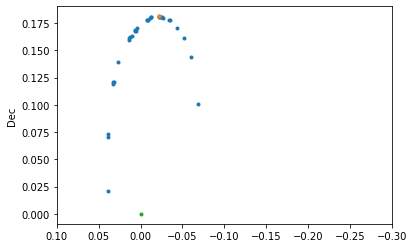

In [197]:
plt.plot(s2_ra, s2_dec, '.')
plt.plot(s2_ra[22], s2_dec[22], '.')
plt.plot([0],[0], '.')
plt.ylabel('Dec')
plt.xlim([0.1,-0.3])

In [182]:
#Setting orbital parameter values
e_s2 = 0.872
a_s2 = 0.121*arc_sec_to_rad
dist = 1.689*10**9 # AU

Omega_s2 = 231.9*np.pi/180. #Converting to radian
omega_s2 = 68.9*np.pi/180. #Converting to radian
i_s2 = 138.1*np.pi/180. #Converting to radian

RA = s2_ra[22]
DEC = s2_dec[22]
t1 = time[22]
RA2 = s2_ra[23]
DEC2 = s2_dec[23]
t2 = time[23]

print(t1, t2)

2009.334 2009.501


In [183]:
delta_t = t2-t1
delta_t

0.16699999999991633

In [217]:
def calc(DEC_, RA_):
    rad_sky = np.arctan(DEC_/RA_)
    rad = np.arctan(np.tan(rad_sky-Omega_s2)/np.cos(i_s2))-omega_s2
    r_s2 = a_s2*(1-e_s2**2)/(1+e_s2*np.cos(rad))

    x_s2 = r_s2*np.cos(rad)
    y_s2 = r_s2*np.sin(rad)
    
    au_x = dist*x_s2
    au_y = dist*y_s2 
    return au_x, au_y


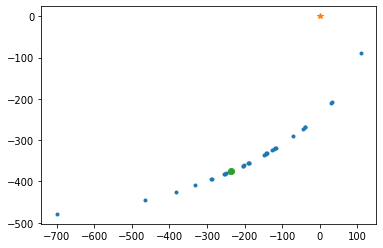

In [226]:
x_, y_ = [],[]
for i in range(len(s2_ra)):
    x, y = calc(s2_dec[i], s2_ra[i])
    x_.append(x)
    y_.append(y)


plt.plot(x_,y_, '.')
plt.plot([0],[0], '*')
plt.plot(x_[22],y_[22], 'o')

In [227]:
np.sqrt(500**2+700**2)

860.2325267042627

In [228]:
au_x1, au_y1 = calc(RA, DEC)
au_x2, au_y2 = calc(RA2, DEC2)

In [229]:
# Find velocity 

In [230]:
vx = (au_x1-au_x2)/delta_t
vy = (au_y1-au_y2)/delta_t

In [231]:
au_x1

126.76643881082241

In [232]:
au_y1

-7.09017897239799

In [233]:
vx

-0.1581746565539776

In [234]:
vy

-5.677629195494182